# Robot Kinematics Dataset
![ABB-IRB-120 Robot Arm](robot.jpg)

<div style="background-color: #f2f2f2; padding: 20px; border-radius: 10px; text-align: center;">
    <h1 style="color: #333; font-family: Arial, sans-serif;">Robot Kinematics Dataset</h1>
    <p style="color: #555; font-family: 'Courier New', monospace;">Author: Fadi Helal<br>Student ID: 2312951<br><a href="AB4250@student.jamk.fi" target="_blank">AB4250@student.jamk.fi</a><br>JAMK - 2024</p>
    <a href="https://www.kaggle.com/datasets/sandibaressiegota/robot-kinematics-dataset/data" target="_blank">Access the Dataset on Kaggle</a>
    <br>
    <img src="robot.jpg" alt="ABB-IRB-120 Robot Arm" width="50%"/>
    <br>
</div>

# Forward Kinematics

Forward Kinematics (FK) is a method used to determine the position and orientation of the end-effector based on known joint parameters. It is fundamental in robotics, animation, and computer graphics.

## Basic Concepts

**Forward Kinematics:** This is the calculation of the end-effector position and orientation from specific joint parameters.

**Inverse Kinematics:** In contrast to FK, inverse kinematics (IK) is the process of finding the joint parameters that will achieve a desired position and orientation of the end-effector.

## Importance

Forward Kinematics is vital for the following reasons:

- It provides a direct computation of end-effector location from joint angles, which is essential for the basic operation of robotic manipulators.
- It is critical for planning and simulation in robotics.
- FK is the foundational concept for more complex movements in animation and computer graphics.

## Methods

Common methods for computing forward kinematics include:

- **Denavit-Hartenberg (D-H) Convention:** A systematic method to describe the geometry of a kinematic chain.
- **Geometric Approaches:** Using trigonometric relationships to calculate the position of the end-effector.
- **Matrix Transformation:** Utilizing homogeneous transformation matrices to model the kinematics of robotic arms.

## Challenges

While Forward Kinematics is a more straightforward calculation than IK, it presents its own challenges:

- **Complexity with Multiple Joints:** The more joints a manipulator has, the more complex the kinematic chain and calculations become.
- **Real-time Computation:** For real-time applications, the calculations need to be efficient and fast.

## Applications

Forward Kinematics is essential in various applications such as:

- **Robotics:** For controlling robotic arms in industrial settings.
- **Animation:** To animate characters and objects in a 3D space.
- **Simulation:** In simulating and planning robotic movements.
anical systems and virtual characters.


# About Dataset
### Context
Inverse kinematics of robotic manipulators can be complex to determine analitically. Inverse kinematics are extremelly important, as they allow us to determine the position of the robot joints needed to position the robot end-effector at a certain point in space. But, direct kinematics are much simpler to determine. To obtain the shared dataset, direct kinematics of a IRB 120 robotic manipulator have been determined. This allows us to use robot coordinates in the joint-coordinate space (the angles of each individual robot joint) to determine the tool-coordinate space (x, y, z with the origin in the base of the robotic manipulator).

 - For more details please refer to papers in "Citations" section

### Citations
Baressi Šegota S, Anđelić N, Mrzljak V, Lorencin I, Kuric I, Car Z. Utilization of multilayer perceptron for determining the inverse kinematics of an industrial robotic manipulator. International Journal of Advanced Robotic Systems. 2021 Aug 13;18(4):1729881420925283.
Car Z, Baressi Šegota S, Anđelić N, Lorencin I, Musulin J, Štifanić D, Mrzljak V. Determining Inverse Kinematics of a Serial Robotic Manipulator Through the Use of Genetic Programming Algorithm. 8th International Congress of the Serbian Society of Mechanics. 2021 July 21.
We kindly ask you to cite at least one of the papers in any research based on this dataset!

### Content
The data is generated by uniformely randomly generating values of joints within possible ranges (please refer to "IRB 120 Product Manual" by ABB) for each of the six joints of the robotic manipulator - in radians. With these values generated, the direct kinematic equations are used to determine the x, y, and z coordinate for the given joint coordinates. This pair of vectors constitutes a single datapoint, while the entire dataset consists of 15,000 datapoints generated in this manner.

### Acknowledgements
This research was (partly) supported by the CEEPUS network CIII-HR-0108, European Regional Development Fund under the grant KK.01.1.1.01.0009 (DATACROSS), project CEKOM under the grant KK.01.2.2.03.0004, CEI project “COVIDAi” (305.6019-20), University of Rijeka scientific grant uniri-tehnic-18-275-1447.

Inspiration
We have already performed research in regression based on the dataset using Multilayer Perceptron and Genetic Programming (please see the "Citations" section of this document) - can you achieve better results? Or compare and contrast with a novel regression method? We're looking forward to your work!

In [1]:
# Loading the important libraries.
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

This section covers the initial steps to prepare the dataset for the deep learning model. The dataset consists of features representing the joint angles of a robotic arm and target values corresponding to the end-effector positions. The goal is to predict the end-effector positions based on the given joint angles.

### Loading the Dataset

```python
df = pd.read_csv('robot_inverse_kinematics_dataset.csv')


In [11]:
#%% Data Preprocessing

# Load the dataset
df = pd.read_csv('robot_inverse_kinematics_dataset.csv')

# Features are the joint angles
X = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].values

# Targets are the end-effector positions
y = df[['x', 'y', 'z']].values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Creating TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check for missing values
print(df.isnull().sum())

# Summary statistics for anomaly detection
print(df.describe())

q1    0
q2    0
q3    0
q4    0
q5    0
q6    0
x     0
y     0
z     0
dtype: int64
                 q1            q2            q3            q4            q5  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.000855     -0.009156      1.572407      0.018612     -0.009395   
std        1.655036      1.110602      0.201659      1.619865      1.211110   
min       -2.880000     -1.920000      1.220000     -2.790000     -2.090000   
25%       -1.430000     -0.979250      1.400000     -1.380000     -1.060000   
50%        0.006850     -0.010200      1.570000      0.038650     -0.021100   
75%        1.420000      0.957000      1.750000      1.410000      1.040000   
max        2.880000      1.920000      1.920000      2.790000      2.090000   

                 q6             x             y             z  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean       3.143289     -0.005186     -0.000697      0.257294  
std        

## Checking the Data

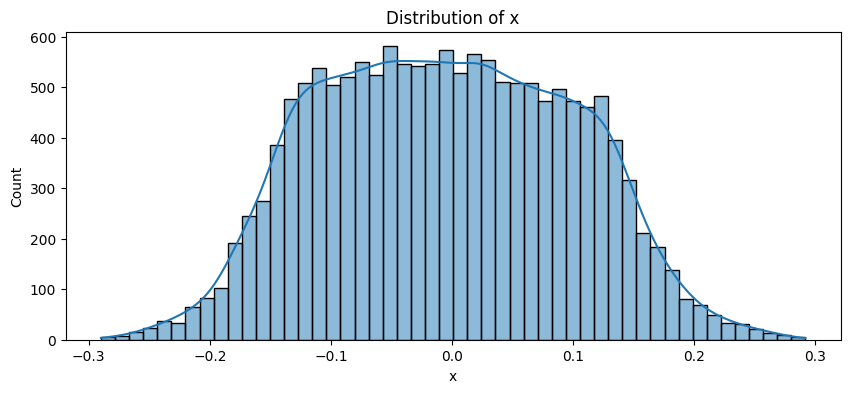

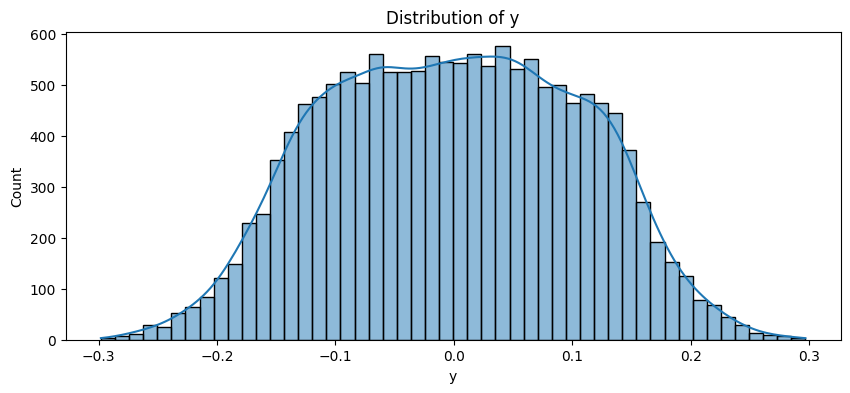

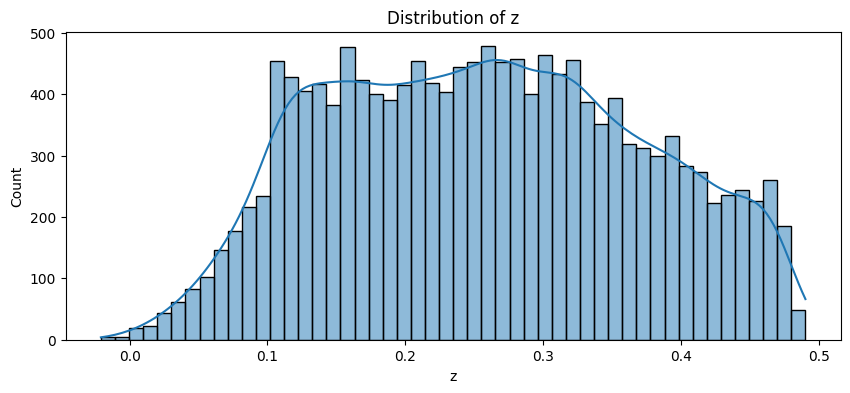

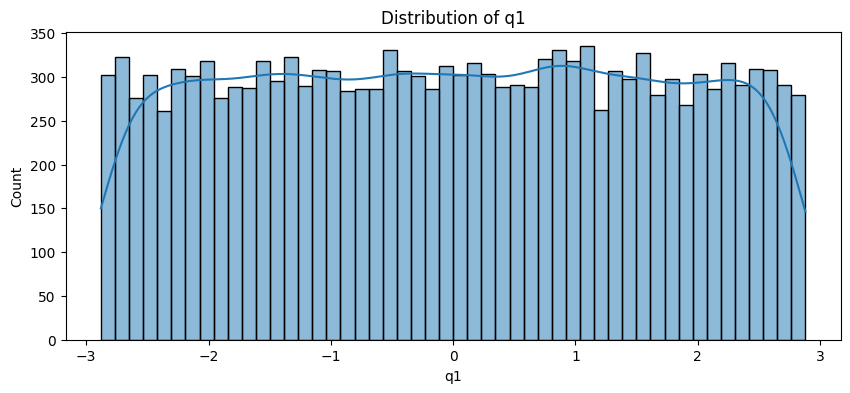

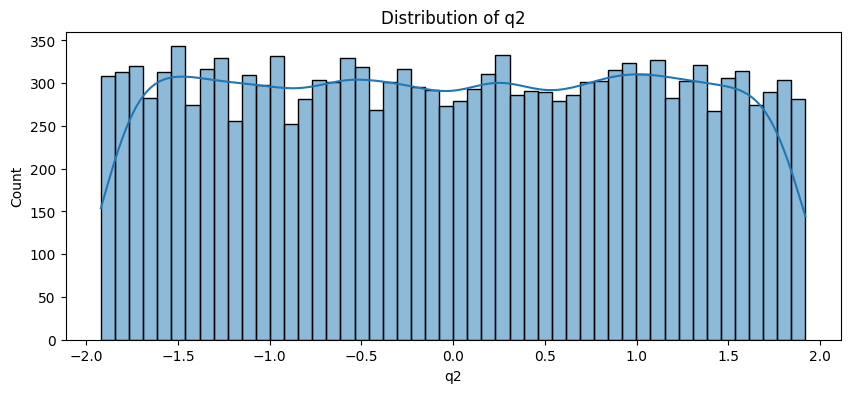

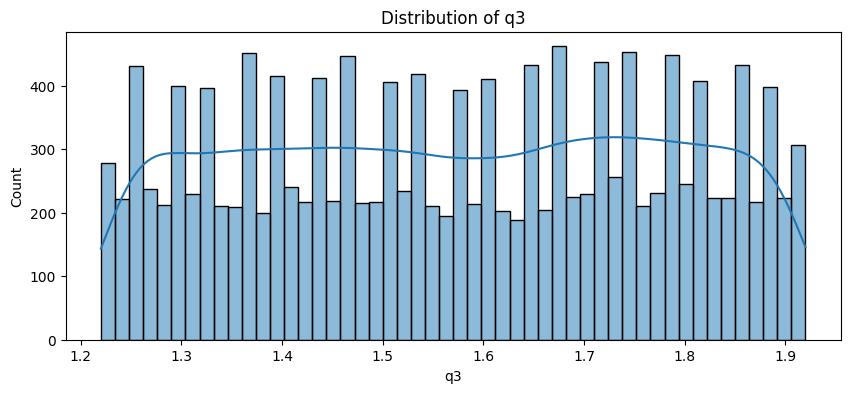

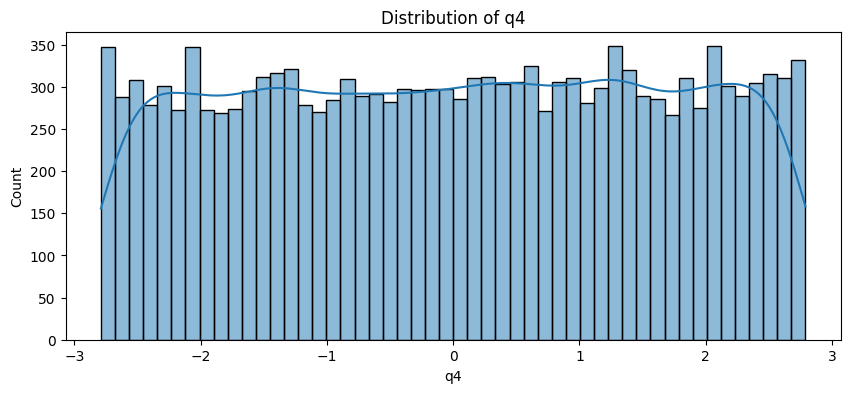

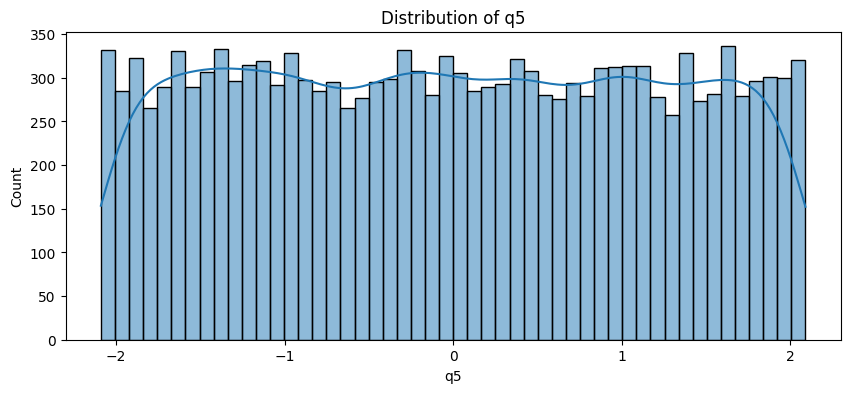

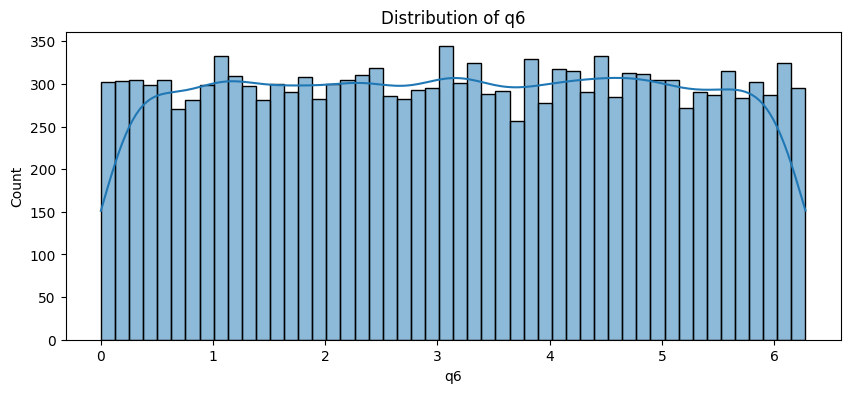

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of the features and targets
features = ['x', 'y', 'z']
targets = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']

for feature in features + targets:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


### Defining the Neural Network Model

In this section, we define the architecture of our neural network model, `InverseKinematicsNet`, which will be used to predict the end-effector positions of a robotic arm based on its joint angles.

#### Model Architecture:

The `InverseKinematicsNet` class extends `torch.nn.Module`, which is the base class for all neural network modules in PyTorch. This model comprises three main fully connected layers:

1. `self.fc1`: The first fully connected (dense) layer that takes `input_size` features as input (corresponding to the number of joint angles) and transforms them into 64 features. The `input_size` should match the number of input features (joint angles in our case).

2. `self.fc2`: The second fully connected layer that takes the 64 features from `fc1` and again outputs 64 features. This layer helps to add depth to the network, allowing it to learn more complex relationships.

3. `self.fc3`: The final fully connected layer that takes the 64 features from `fc2` and outputs `output_size` features, which correspond to the predicted end-effector positions (`x`, `y`, `z`). Thus, the `output_size` should typically be 3 for the 3D positions.

#### Activation Functions:

- After `self.fc1` and `self.fc2`, a ReLU (Rectified Linear Unit) activation function is applied. ReLU is chosen for its ability to introduce non-linearity into the network, helping it learn complex patterns without significantly increasing computational cost.

#### Forward Pass:

- The `forward` method describes how the input data `x` flows through the network. It sequentially passes through `fc1`, `fc2`, and `fc3`, with ReLU activations applied after the first two layers. The output of the `forward` method is the final prediction from the network.

#### Model Initialization:

```python
model = InverseKinematicsNet(X_train.shpe[1], y_train.shape[1])
e model.
layer
        return x


![model.png](model.png)

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class InverseKinematicsNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(InverseKinematicsNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = InverseKinematicsNet(X_train.shape[1], y_train.shape[1])


### Model Training Process

This section outlines the training process for our `InverseKinematicsNet` model. The training loop is designed to iteratively adjust the model's parameters to minimize the prediction error, quantified using the Mean Squared Error (MSE) loss function.

#### Setting Up the Optimizer and Loss Function:

- **Optimizer**: We use the Adam optimizer, a popular choice for deep learning tasks due to its adaptive learning rate properties. The learning rate is set to `0.001`, a common starting point that can be adjusted based on the model's performance.
  
  ```python
  optimizer = torch.optim.Adam(model.parameearning_rateers(), l=0.001)



In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
# Initialize lists to track the losses
train_losses = []

epochs = 100
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    epoch_losses = []  # List to store losses for each batch

    for data, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model(data)  # Forward pass
        loss = criterion(outputs, targets)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_losses.append(loss.item())  # Store the loss for this batch

    # Compute the average loss for this epoch
    epoch_loss = np.mean(epoch_losses)
    train_losses.append(epoch_loss)  # Store the average loss for this epoch

    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')


Epoch 1/100, Loss: 0.0079
Epoch 2/100, Loss: 0.0042
Epoch 3/100, Loss: 0.0026
Epoch 4/100, Loss: 0.0019
Epoch 5/100, Loss: 0.0015
Epoch 6/100, Loss: 0.0012
Epoch 7/100, Loss: 0.0010
Epoch 8/100, Loss: 0.0009
Epoch 9/100, Loss: 0.0008
Epoch 10/100, Loss: 0.0007
Epoch 11/100, Loss: 0.0007
Epoch 12/100, Loss: 0.0006
Epoch 13/100, Loss: 0.0006
Epoch 14/100, Loss: 0.0006
Epoch 15/100, Loss: 0.0005
Epoch 16/100, Loss: 0.0005
Epoch 17/100, Loss: 0.0005
Epoch 18/100, Loss: 0.0004
Epoch 19/100, Loss: 0.0004
Epoch 20/100, Loss: 0.0004
Epoch 21/100, Loss: 0.0004
Epoch 22/100, Loss: 0.0004
Epoch 23/100, Loss: 0.0004
Epoch 24/100, Loss: 0.0004
Epoch 25/100, Loss: 0.0004
Epoch 26/100, Loss: 0.0003
Epoch 27/100, Loss: 0.0003
Epoch 28/100, Loss: 0.0003
Epoch 29/100, Loss: 0.0003
Epoch 30/100, Loss: 0.0003
Epoch 31/100, Loss: 0.0003
Epoch 32/100, Loss: 0.0003
Epoch 33/100, Loss: 0.0003
Epoch 34/100, Loss: 0.0003
Epoch 35/100, Loss: 0.0003
Epoch 36/100, Loss: 0.0003
Epoch 37/100, Loss: 0.0003
Epoch 38/1

### Visualizing Training Loss

**After completing the training process, it's essential to visualize how the loss has decreased over time. This visualization helps in understanding the learning behavior of the model and in identifying any potential issues such as overfitting or underfitting.**

* The `train_losses` list, which contains the average loss for each epoch, is plotted against the number of epochs.
* The x-axis represents the epoch number, and the y-axis represents the loss value.
* The plot is titled "Training Loss Over Epochs" to clearly indicate the nature of the visualization.
* A legend is included to identify the plotted data as the training loss.

#### Interpretation:

**Ideal Outcome:** Ideally, the plot will show a downward trend, indicating that the model's loss is decreasing over time, and thus, the model is learning from the training data.

**Plateaus or Increases:** If the loss plateaus or increases, it may indicate issues such as overfitting, underfitting, or that the learning rate needof each epoch:
ch epoch:


**The following code snippet plots the training loss recorded at the end of each epoch:**

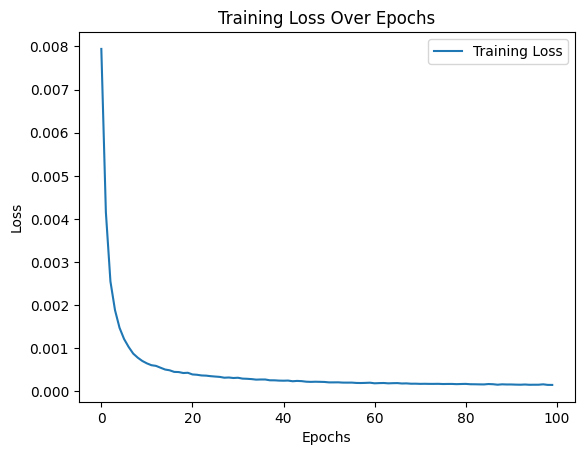

In [5]:
# Visualizing Training Loss Over Epochs
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [6]:
model.eval()
test_loss = 0
with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss}')


Test Loss: 2.773985693541666e-06


### Visualizing Actual vs. Predicted End-Effector Positions

After evaluating the model on the test set, visualizing the actual vs. predicted end-effector positions provides a clear and intuitive way to assess the model's performance. A 3D scatter plot is particularly useful for this task, as it allows us to observe the spatial relationship between the predicted and actual positions.

**Key Steps in Visualization:**

1. **Set Model to Evaluation Mode:** Ensures that the model is in evaluation mode, disabling layers like dropout and batch normalization that behave differently during training and infe)
    ```

2. **Data Collection:** We iterate through the test dataset using the `test_loader`. For each batch, the model's predictions (`outputs`) and the actual targets (`targets`) arts.numpy())
    ```

3. **Data Preparation:** The lists of actual and predicted positions are converted to numpy arrays for easier manipulatedicted_positions)
    ```

4. **3D Scatter Plot:** We use `matplotlib` and its `mpl_toolkits.mplot3d` module to create a 3D scatter plot. Actual positions are plotted in blue, and predicted positions arelor='r', label='Predicted')
    ```

5. **Customization:** The plot is customized with labels for each axis, a title, and a legend to differentiate beffector Positions')
    ax.legend()
    ```

**Interpretation:**

- A closer alignment between the red and blue points indicates higher model accuracy in predicting the end-effector positions.
- Significant discrepancies between the actual and predicted points might indicate areas where the model struggles or potential for further model refinement.

This visualization provides a direct and impactful way to assess the model's predictive accuracy and to identify areas for improvement.


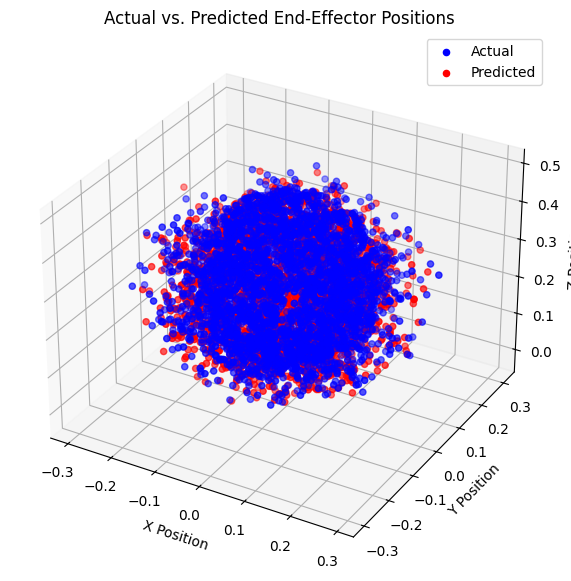

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# test_loader ready and the model is already trained

model.eval()  # Set the model to evaluation mode

# Containers for actual and predicted positions
actual_positions = []
predicted_positions = []

with torch.no_grad():  # We don't need to track gradients here
    for data, targets in test_loader:
        outputs = model(data)
        actual_positions.extend(targets.numpy())
        predicted_positions.extend(outputs.numpy())

# Converting lists to numpy arrays for easier manipulation
actual_positions = np.array(actual_positions)
predicted_positions = np.array(predicted_positions)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual positions in blue
ax.scatter(actual_positions[:, 0], actual_positions[:, 1], actual_positions[:, 2], color='b', label='Actual')
# Predicted positions in red
ax.scatter(predicted_positions[:, 0], predicted_positions[:, 1], predicted_positions[:, 2], color='r', label='Predicted')

# Labels and legend
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Actual vs. Predicted End-Effector Positions')
ax.legend()

plt.show()


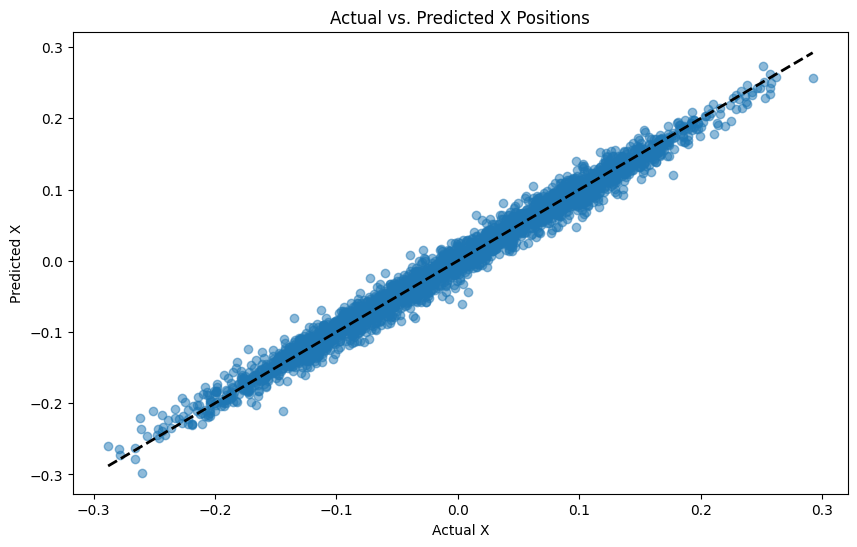

In [8]:
# Visualization of Actual vs. Predicted X Positions
plt.figure(figsize=(10, 6))
plt.scatter(actual_positions[:, 0], predicted_positions[:, 0], alpha=0.5)
plt.plot([actual_positions[:, 0].min(), actual_positions[:, 0].max()], [actual_positions[:, 0].min(), actual_positions[:, 0].max()], 'k--', lw=2)
plt.xlabel('Actual X')
plt.ylabel('Predicted X')
plt.title('Actual vs. Predicted X Positions')
plt.show()


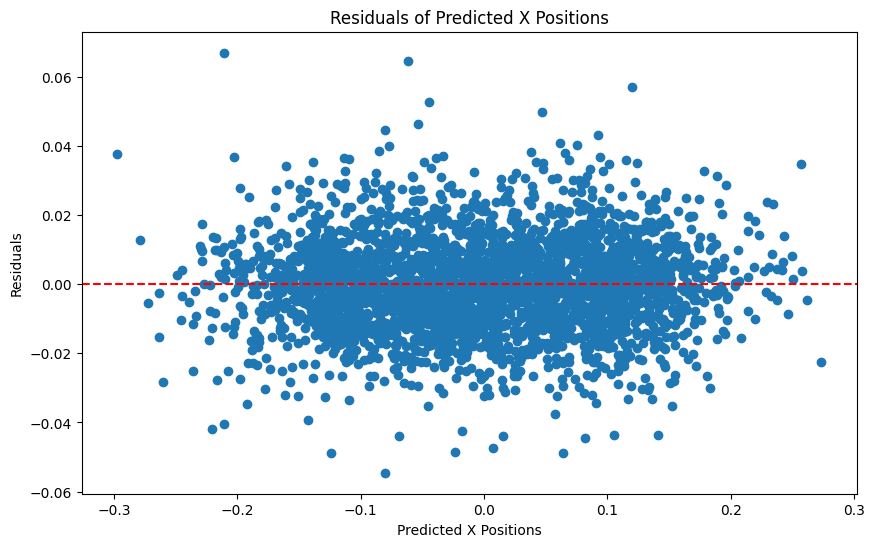

In [9]:
# Visualization of Residuals of Predicted X Positions
residuals = actual_positions - predicted_positions
plt.figure(figsize=(10, 6))
plt.scatter(predicted_positions[:, 0], residuals[:, 0])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted X Positions')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted X Positions')
plt.show()


## Model Evaluation

The following Python code evaluates the performance of a trained model using various evaluation metrics. Here's a breakdown of the code:

1. **Evaluation Metrics Calculation**:
    - The code calculates several evaluation metrics:
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - Mean Absolute Error (MAE)
        - R-squared (R²)
    - These metrics help assess how well the model's predictions align with the actual values.

2. **Code Description**:
    - The trained model is set to evaluation mode using `model.eval()`.
    - Lists are created to store the actual and predicted positions of the model.
    - With torch.no_grad(), the model's predictions are computed without tracking gradients to save memory and computation time.
    - The calculated evaluation metrics are printed, including MSE, RMSE, MAE, and R².

3. **Interpretation of Evaluation Metrics**:
    - Mean Squared Error (MSE): Measures the average of the squares of the errors.
    - Root Mean Squared Error (RMSE): Represents the square root of the MSE.
    - Mean Absolute Error (MAE): Indicates the average of the absolute errors.
    - R-squared (R²): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

4. **Results**:
    - The code prints the calculated values of the evaluation metrics, providing insights into how well the model performs on the test dataset.


Mean Squared Error (MSE): 0.0001770939416019246
Root Mean Squared Error (RMSE): 0.013307664543390274
Mean Absolute Error (MAE): 0.010318905115127563
R-squared (R²): 0.9843286314328523


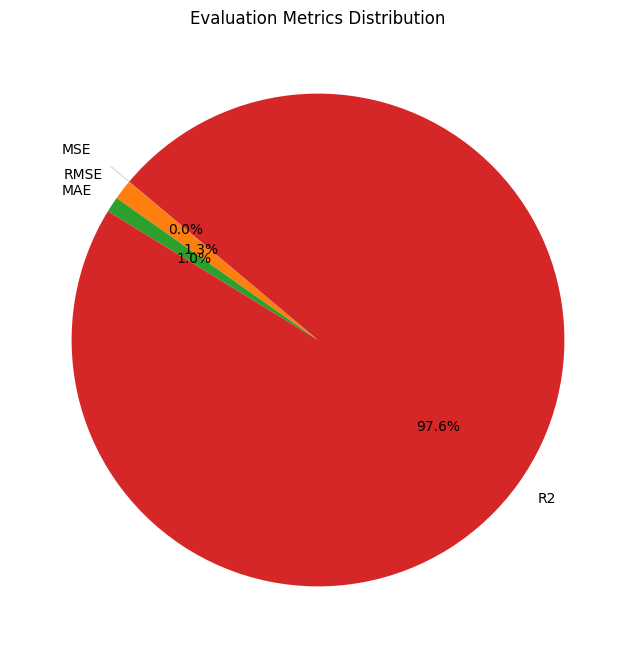

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()  # Set the model to evaluation mode

# Containers for actual and predicted positions
actual_positions = []
predicted_positions = []

with torch.no_grad():  # We don't need to track gradients here
    for data, targets in test_loader:
        outputs = model(data)
        actual_positions.extend(targets.numpy())
        predicted_positions.extend(outputs.numpy())

# Converting lists to numpy arrays for easier manipulation
actual_positions = np.array(actual_positions)
predicted_positions = np.array(predicted_positions)

# Calculating evaluation metrics
mse = mean_squared_error(actual_positions, predicted_positions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_positions, predicted_positions)
r2 = r2_score(actual_positions, predicted_positions)

# Printing the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Sum of all metrics for normalization
total = mse + rmse + mae + r2

# Normalized values for pie chart
values = [mse / total, rmse / total, mae / total, r2 / total]
labels = ['MSE', 'RMSE', 'MAE', 'R2']
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (MSE)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Evaluation Metrics Distribution')
plt.show()
